## Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_excel('IDataset1.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

[[0.0 1.0 0.5 1.5]
 [0.0 1.0 0.5 2.5]
 [0.0 1.0 0.5 3.5]
 ...
 [1.0 0.0 25.0 18.0]
 [1.0 0.0 25.0 19.0]
 [1.0 0.0 25.0 20.0]]


## Calling the Random Forest Regressor

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2, 3, 4],
               'n_estimators' : [5, 10, 25, 50, 100, 200]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9745398391407594
Best Parameters: {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


## Training the Decision Tree Regression model on the Training set

In [2]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50,
                                  max_depth = 14,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  random_state = 67)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=67)

## Create a KFold object with 5 splits 

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())
regressor

[0.96835603 0.99079025 0.9910062  0.93985226 0.98269445]
0.9745398391407594


RandomForestRegressor(max_depth=14, n_estimators=50, random_state=67)

## Predicting the Test set results

In [3]:
y_pred = regressor.predict(X_test)
#print (y_pred)
#print (y_test)
#print (len(y_pred))
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(file)

[[ 21.42  20.56]
 [338.62 323.97]
 [114.15 114.25]
 [ 94.48  74.26]
 [281.92 293.22]
 [134.59 136.86]
 [ 96.52  99.  ]
 [133.87 138.  ]
 [351.4  385.24]
 [106.35 103.36]
 [160.16 148.77]
 [236.36 239.61]
 [ 88.45  90.43]
 [ 37.17  33.86]
 [187.55 170.01]
 [ 31.12  27.91]
 [ 61.58  61.02]
 [ 32.    22.34]
 [ 32.12  30.39]
 [ 72.89  71.26]
 [369.53 377.38]
 [ 80.12  79.63]
 [ 75.13  73.54]
 [ 41.77  40.54]
 [208.55 204.93]
 [ 31.27  28.38]
 [170.08 159.3 ]
 [ 75.62  74.79]
 [108.87 103.92]
 [ 65.21  65.63]
 [167.44 164.29]
 [ 59.82  52.29]
 [ 51.8   48.96]
 [  5.74   5.49]
 [151.7  151.27]
 [ 54.84  54.48]
 [106.06  96.38]
 [103.88 105.61]
 [ 64.46  64.6 ]
 [ 99.47  97.63]
 [ 51.49  51.99]
 [ 94.07  95.93]
 [273.57 271.69]
 [121.15 118.52]
 [155.78 142.84]
 [123.69 124.71]
 [132.39 135.44]
 [ 26.67  24.41]
 [ 18.26  17.94]
 [343.1  367.34]
 [ 50.16  49.1 ]
 [130.53 136.91]
 [ 69.08  67.7 ]
 [218.25 202.75]
 [334.48 343.73]
 [ 89.07  85.17]
 [183.87 172.47]
 [177.97 179.97]
 [ 15.92  15.0

## Evaluating the Model Performance

### R2

In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9906282830403664


### Adjusted R2

In [7]:
#import math

adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9902712652514281


### RMSE

In [8]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

9.16795665142591

### MAE

In [9]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

5.695826612833288

## Visualize

Text(0, 0.5, 'Predicted data')

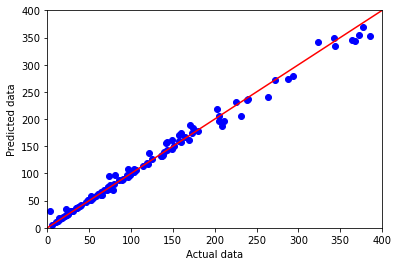

In [10]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot ([0,400],[0,400], color = "red")
plt.axis ([0,400,0,400])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

## Error percentage visualization

Text(250, 75, 'Adj.$R^2$ = 0.990')

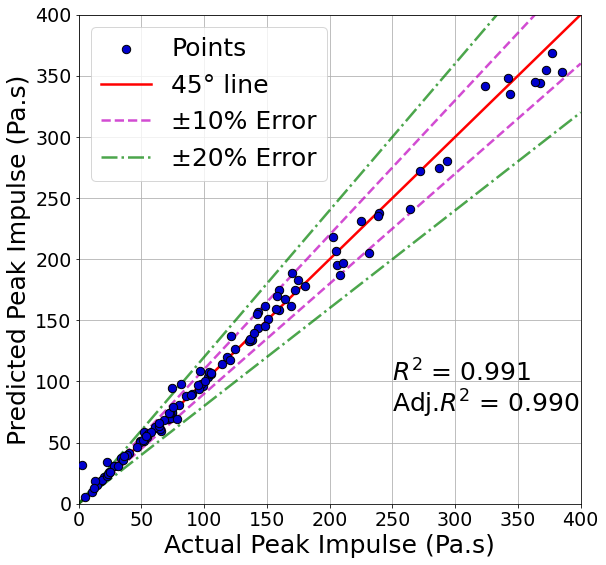

In [12]:
from sklearn.metrics import r2_score
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
ax.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,400)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (250, 100),fontsize = 25)  #Model is called here
ax.annotate("Adj.$R^2$ = {:.3f}".format(adj_r2), (250, 75),fontsize = 25)

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')

In [13]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))

Within 10% margin 88.18%
Within 20% margin 95.45%


## <100 kPa

## Save the model to disk

In [4]:
import pickle
filename = 'finalized_model_RF.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Make new predictions

In [5]:
%%timeit -r 1 -n 1
comp_data = pd.read_excel('ForPaperComparison.xlsx')
print (comp_data)
comp_data_pred = regressor.predict(comp_data)
print (comp_data_pred)

    CompB  TNT  Charge_size  Standoff_distance
0       0    1          8.7                  1
1       0    1          8.7                  2
2       0    1          8.7                  3
3       0    1          8.7                  4
4       0    1          8.7                  5
5       0    1          8.7                  6
6       0    1          8.7                  7
7       0    1          8.7                  8
8       0    1          8.7                  9
9       0    1          8.7                 10
10      0    1          8.7                 11
11      0    1          8.7                 12
12      0    1          8.7                 13
13      0    1          8.7                 14
14      0    1          8.7                 15
15      0    1          8.7                 16
16      0    1          8.7                 17
17      0    1          8.7                 18
18      0    1          8.7                 19
19      0    1          8.7                 20
[285.28 265.9

C:\Users\Chathura Gamage\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


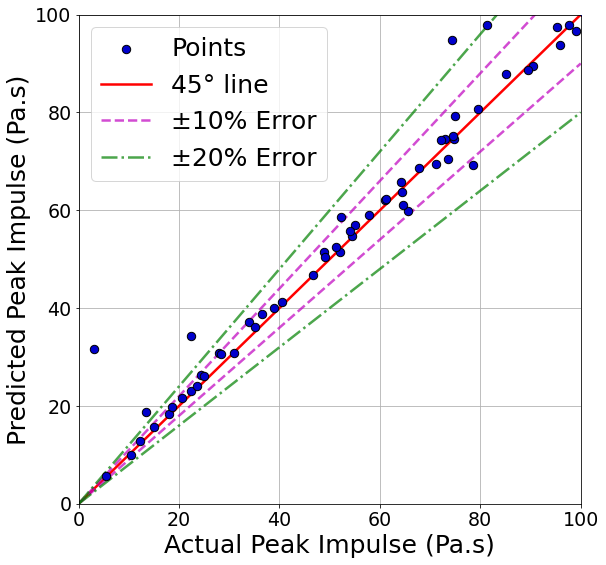

In [14]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, bx = plt.subplots(figsize = (9, 9))


#y = y_pred         # Model on prvious line is called here
#x = y_test



# Add scatterplot
bx.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
# b, a = np.polyfit(x, y, deg=1)

# Create sequence of 50 numbers from 0 to 5 
#xseq = np.linspace(0, 5)



plt.ylabel('Predicted Peak Impulse (Pa.s)',fontsize = 25)
plt.xlabel('Actual Peak Impulse (Pa.s)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


# Plot regression line
# ax.plot(xseq, a + b * xseq, color="Red", lw=2.5,label='X=Y',alpha=1);


x1 = np.linspace(0,100)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

bx.spines['left'].set_color('black')        # setting up Y-axis tick color to red
bx.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red



#ax.annotate("$R^2$ = {:.3f}".format(r2_score(y_test, y_pred)), (5000, 2000),fontsize = 25)  #Model is called here

#plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')